In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from sklearn.model_selection import train_test_split

In [77]:
# 读取excel数据，第一行为列名
file = "data/data.xlsx"
data = pd.read_excel(file, header=0)

# 截取数据的第7列至最后一列
x = data.iloc[:, 6:-3]

# 特征
y = data.iloc[:, 5]

print(y.describe())

count     1237
unique       4
top         7#
freq       326
Name: 机号, dtype: object


In [78]:
# 检查并处理缺失值（NaNs）和异常值（outliers）
def preprocess_data(df):
    # 检查缺失值
    if df.isnull().values.any():
        # 如果存在的缺失值是-3至-1列，则删除这行数据；如果存在的缺失值是其他列，则用均值填充
        for col in df.columns[-3:]:
            df = df[df[col].notna()]
        df = df.fillna(df.mean())
    else:
        print("数据中没有缺失值。")

    # 检查异常值
    for column in df.select_dtypes(include=[np.number]).columns:
        if (df[column] < 0).any():
            print(f"列 {column} 存在异常值（负数），正在处理...")
            df[column] = df[column].clip(lower=0)

    print("异常值已处理。")
    return df

print("数据预处理前的形状:", x.shape)
x = preprocess_data(x)
print("数据预处理后的形状:", x.shape)

数据预处理前的形状: (1237, 40)
异常值已处理。
数据预处理后的形状: (1237, 40)


In [79]:
print("原始y的前几行：")
print(y.head())
print(y.shape)

# 将y使用one-hot编码
y = pd.get_dummies(y)
print("经过one-hot编码后的y的前几行：") 
print(y.head())
print(y.shape)

# 将bool类型的列转换为int类型
y = y.astype(int)
print("经过类型转换后的y的前几行：")
print(y.head())

原始y的前几行：
0    5#
1    5#
2    7#
3    7#
4    9#
Name: 机号, dtype: object
(1237,)
经过one-hot编码后的y的前几行：
     11#     5#     7#     9#
0  False   True  False  False
1  False   True  False  False
2  False  False   True  False
3  False  False   True  False
4  False  False  False   True
(1237, 4)
经过类型转换后的y的前几行：
   11#  5#  7#  9#
0    0   1   0   0
1    0   1   0   0
2    0   0   1   0
3    0   0   1   0
4    0   0   0   1


## 利用多层感知机进行分类分析

In [80]:
# 划分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("训练集形状:", x_train.shape, y_train.shape)
print("测试集形状:", x_test.shape, y_test.shape)

训练集形状: (989, 40) (989, 4)
测试集形状: (248, 40) (248, 4)


In [81]:
# 进行Z-score标准化
from sklearn.preprocessing import StandardScaler
# print("原始数据的统计信息:")
# print(data.describe())

# 2. 创建并使用 StandardScaler
# 创建StandardScaler的实例
scaler_x = StandardScaler()

# 使用 .fit_transform() 一步完成拟合和转换
# 注意：StandardScaler的输出是一个NumPy数组，而不是Pandas DataFrame
scaled_x_train = scaler_x.fit_transform(x_train)

In [82]:
# define the MLP model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(32, 16, 8), max_iter=4000)
mlp.fit(scaled_x_train, y_train)

,hidden_layer_sizes,"(32, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,4000
,shuffle,True
,random_state,None


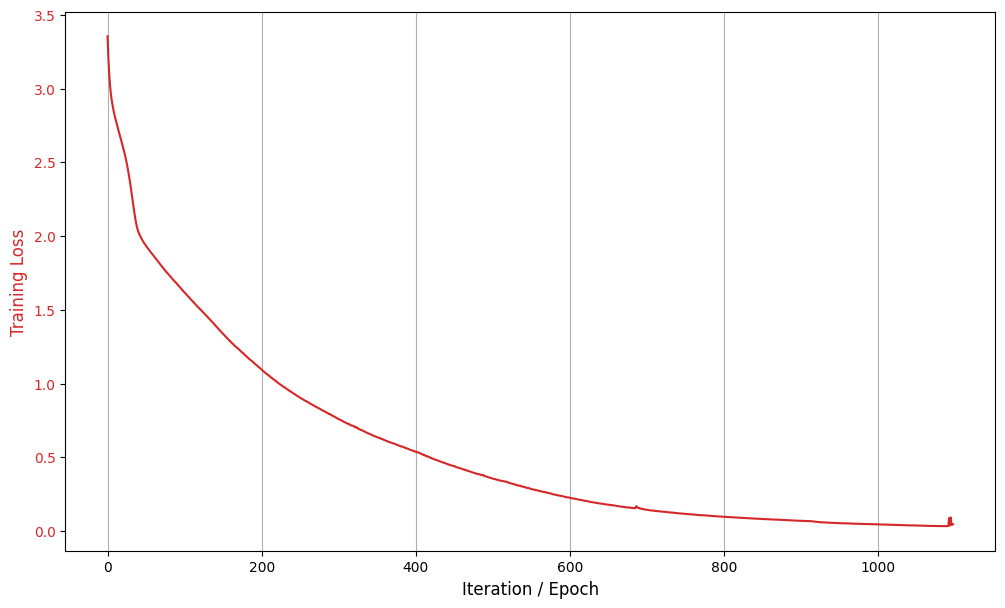

In [83]:
# --- 可视化训练损失和验证得分 ---
fig, ax1 = plt.subplots(figsize=(12, 7))

# 绘制训练损失曲线
color = 'tab:red'
ax1.set_xlabel('Iteration / Epoch', fontsize=12)
ax1.set_ylabel('Training Loss', color=color, fontsize=12)
ax1.plot(mlp.loss_curve_, color=color, label='Training Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, axis='x')
plt.show()

In [84]:
# 在测试集上进行预测
scaled_x_test = scaler_x.transform(x_test)
y_pred = mlp.predict(scaled_x_test)

# 计算准确率
N_correct = np.sum(np.all(y_pred == y_test.values, axis=1))
accuracy = N_correct / y_test.shape[0]
print(f"测试集上的准确率: {accuracy:.4f}")

测试集上的准确率: 0.3105
